# Diamond Price Prediction- final by JIAQI LIU

Introduction:

In this reserarch, i find a csv file which covers several factors which can effect the final price of the diamonds. And at last we want to find a reletively convincing function to predict the diamonds' prices.

So in this experiment, what i want to find is the factors that can influence diamonds' price strongly and factors with weak influcence. So we care most about the relationship between factors and the credibility of the function in the research when we want to use the function to do some predictions in the future.

Also, many other scholors do researchers on this topic. For example, in the study of diamonds price, Jean Brou, Mbodja Mougoué, Eugene Kouassi, Kebaabetswe Thulaganyo and Benjamin Acquah find that it is related closely with exporting countries' economic conditions. At the same time, Stanislav Mamonov and Tamilla Triantoro think that the diamonds price is really unique since it largely dependent on socially constructed beliefs. Of course, they find that diamond weight, color and clarity are the key characteristics that influence diamond prices.

Data:

I just find a perfect dataset from kaggle, which is called the "diamonds. csv". It covers 10 variables with 53940 lists, which are carat, cut, color, clarity, depth, table, price, x y and z. Among them, price is the diamonds price which should be the dependent variable. Others should be the independent variables. Let me explain them in detail. 

First, price means price in US dollars. Carat is weight of the diamond. And cut means the quality, which inclueds 5 levels: Fair, Good, Very Good, Premium, Ideal. Then, the color is diamond colour, ranging from from J (worst) to D (best). Clarity a measurement of how clear the diamond is, which inclues I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1 and IF (best). Then x is length in mm, y is width in mm and z is depth in mm. Next, depth means total depth percentage. And finnaly table means width of top of diamond relative to widest point

Code:

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [7]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 8.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from xgboost import XGBRegressor

In [191]:
data_df = pd.read_csv("../python/diamonds.csv")
data_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [192]:
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [193]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [194]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


# Checking for Potential Outliers

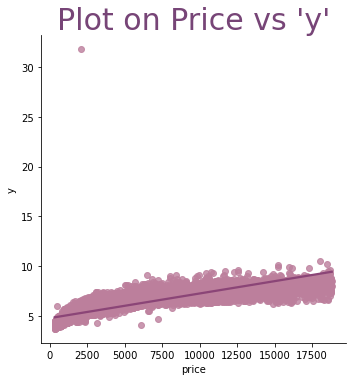

In [216]:
lm = sns.lmplot(x="price", y="y", data=data_df, scatter_kws={"color":"#BC7F9C" }, line_kws={"color": "#8B4577"})
plt.title("Plot on Price vs 'y'", color="#774577", fontsize = 30)
plt.show()

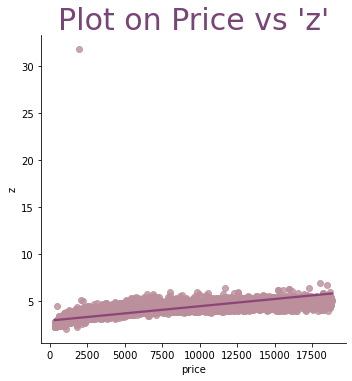

In [217]:
lm = sns.lmplot(x="price", y="z", data=data_df, scatter_kws={"color": "#BC8F9C"}, line_kws={"color": "#8B4577"})
plt.title("Plot on Price vs 'z'", color="#774577", fontsize = 30)
plt.show()

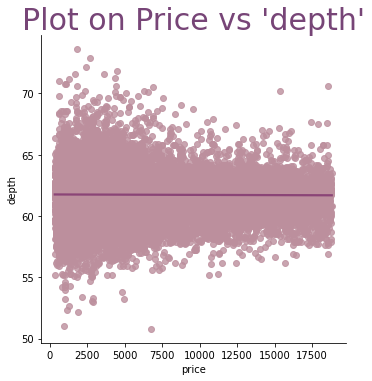

In [219]:
lm = sns.lmplot(x="price", y="depth", data=data_df, scatter_kws={"color": "#BC8F9D"}, line_kws={"color": "#8B4577"})
plt.title("Plot on Price vs 'depth'", color="#774577", fontsize = 30)
plt.show()

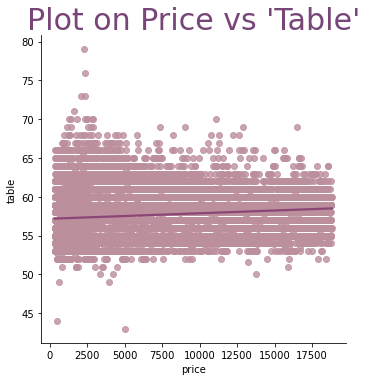

In [218]:
lm = sns.lmplot(x="price", y="table", data=data_df, scatter_kws={"color": "#BC8F9D"}, line_kws={"color": "#8B4577"})
plt.title("Plot on Price vs 'Table'", color="#774577", fontsize = 30)
plt.show()

## Removing outliers 

In [198]:
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.shape

(53940, 10)

In [167]:
# Removing the datapoints having min 0 value in either x, y or z features 
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(53920, 10)

In [199]:
data_df = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
data_df = data_df[(data_df["table"]<80)&(data_df["table"]>40)]
data_df = data_df[(data_df["x"]<40)]
data_df = data_df[(data_df["y"]<40)]
data_df = data_df[(data_df["z"]<40)&(data_df["z"]>2)]
data_df.shape 

(53909, 10)

In [200]:
# Making a copy to keep original data in its form intact
data1 = data_df.copy()
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


<AxesSubplot:>

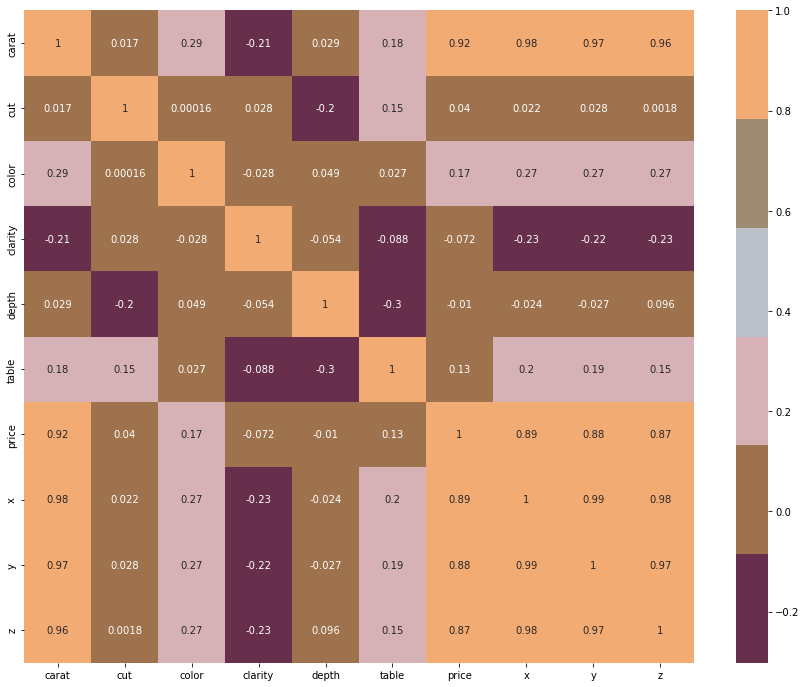

In [220]:
# correlation matrix
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F4D", "#9E724D", "#D6B2B7", "#B9C0C7", "#9F8A74", "#F3AB74"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

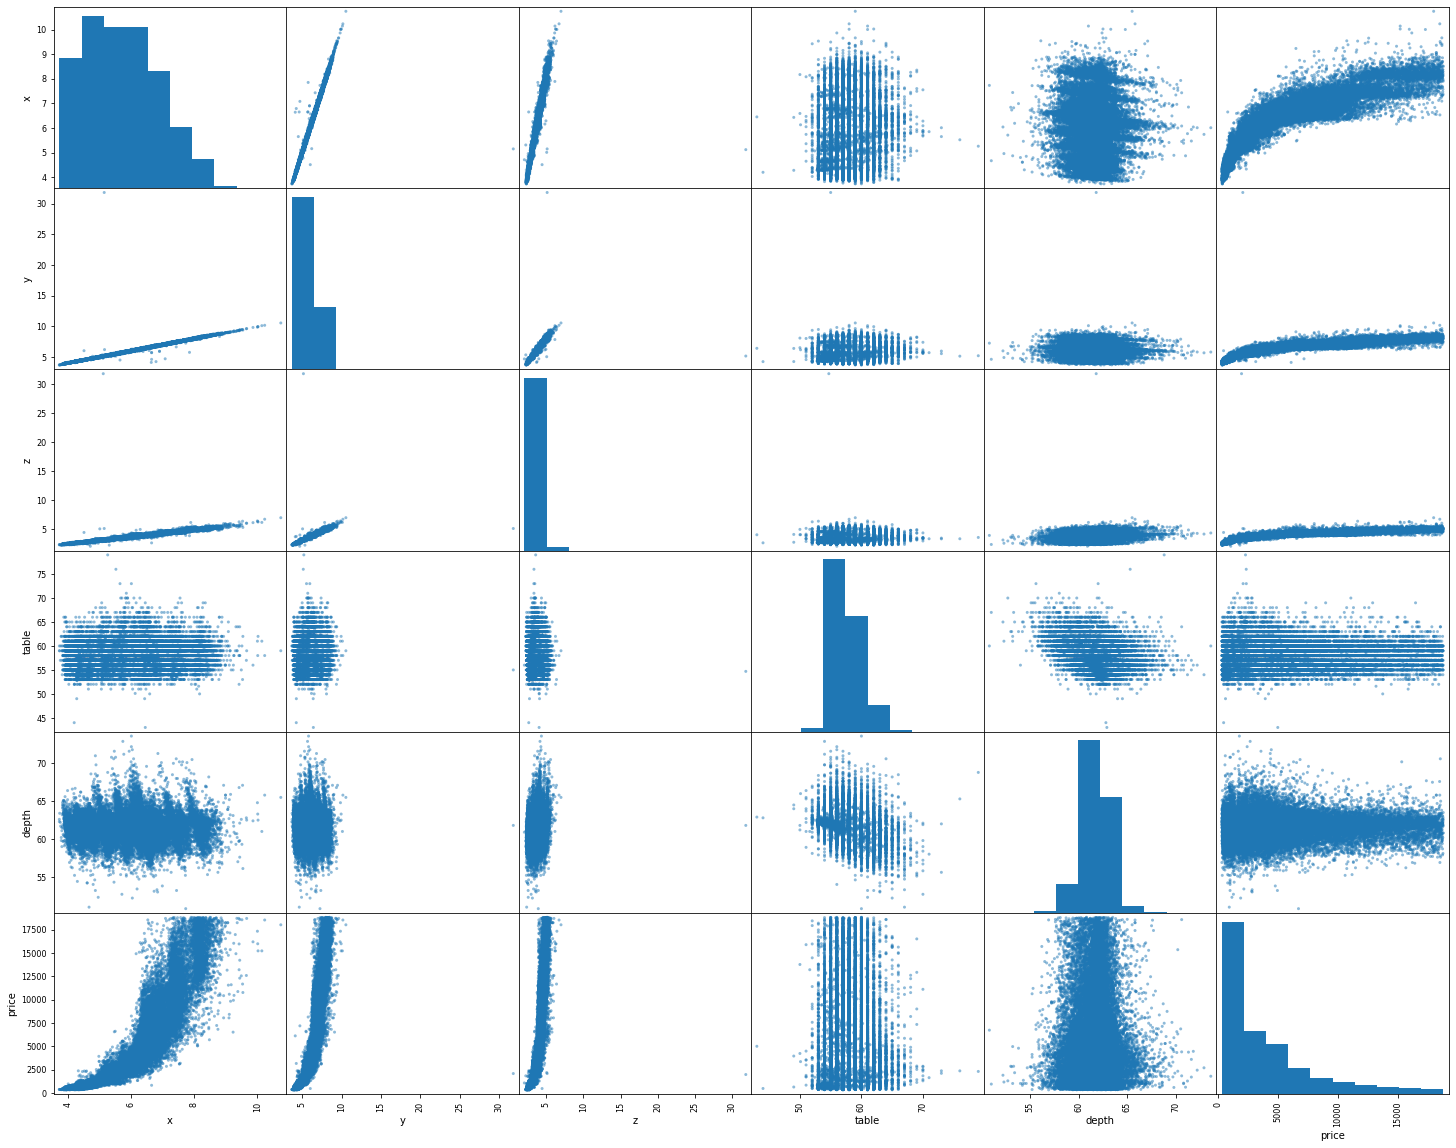

In [202]:
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(data_df[attributes], figsize=(25, 20))
plt.show()

# OLS and prediction

In [203]:
X= data1.drop(["price"],axis =1)
y= data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [204]:
import statsmodels.api as st

In [205]:
xc = st.add_constant(X)
lm = st.OLS(y,xc).fit()

In [206]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 4.641e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        22:36:38   Log-Likelihood:            -4.6498e+05
No. Observations:               53909   AIC:                         9.300e+05
Df Residuals:                   53899   BIC:                         9.301e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.675e+04    426.115     39.315      0.000    1.59e+04    1.76e+04
carat       1.128e+04     61.033    184.835      0.000    1.12e+04    1.14e+04
cut           66.8352      5.804     11.515      0.000      55.459      78.211
color       -267.2545      3.580    -74.652      0.000    -274.271    -260.238
clarity      285.3886      3.479     82.039      0.000     278.570     292.207
depth       -158.0693      5.268    -30.003      0.000    -168.396    -147.743
table        -93.5813      2.821    -33.172      0.000     -99.111     -88.052
x          -1587.5632     56.064    -28.317      0.000   -1697.449   -1477.678
y            374.3389     45.764      8.180      0.000     284.640     464.037
z            -85.2762     46.100     -1.850      0.064    -175.633       5.081
==============================================================================
Omnibus:                    13658.799   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566754.338
Skew:                           0.473   Prob(JB):                         0.00
Kurtosis:                      18.856   Cond. No.                     6.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
import statsmodels.formula.api as smf

In [209]:
model_price = smf.ols('price ~ carat + cut + color + clarity + depth + table + x + y + z', data= data_df).fit()
model_price.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2985.1590,421.273,7.086,0.000,2159.461,3810.857
cut[T.Good],560.6054,33.642,16.664,0.000,494.667,626.544
cut[T.Ideal],806.3637,33.487,24.080,0.000,740.729,871.998
cut[T.Premium],742.5814,32.250,23.026,0.000,679.371,805.792
cut[T.Very Good],698.8747,32.351,21.603,0.000,635.466,762.283
color[T.E],-209.8702,17.844,-11.761,0.000,-244.845,-174.895
color[T.F],-267.3517,18.047,-14.814,0.000,-302.724,-231.980
color[T.G],-476.4590,17.671,-26.963,0.000,-511.095,-441.823
color[T.H],-978.6875,18.787,-52.094,0.000,-1015.510,-941.865
color[T.I],-1469.9616,21.108,-69.641,0.000,-1511.333,-1428.590


# LASSO, KNN, Random Forest and so on

In [253]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])

pipeline_ri=Pipeline([("scalar6",StandardScaler()),
                     ("ri",Ridge())])

In [254]:
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_ri]

pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors",5: "Ridge" }

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [255]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1383.854012 
Lasso: 1366.991298 
DecisionTree: 736.003734 
RandomForest: 549.251751 
KNeighbors: 816.552849 
Ridge: 1382.931866 


In [256]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [257]:
classifier = LinearRegression()
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,verbose = 1)
print('Linear regression accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

Linear regression accuracy:  0.8918175750712664
[0.8733823  0.88237622 0.88874498 0.86990366 0.8769007 ]
mean = 0.8782615700931476, std = 0.00666852371583208


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [258]:
classifier = Ridge(normalize=True)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('Ridge regression accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

Ridge regression accuracy:  0.794056262560923
[0.78671062 0.787589   0.78861871 0.78946739 0.78308179]
mean = 0.7870935018747287, std = 0.0022112227187731006


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [259]:
classifier = Lasso(normalize=True)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('Lasso accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

Lasso accuracy:  0.8705396183854122
[0.86845563 0.86509386 0.86853773 0.86880633 0.85766881]
mean = 0.8657124740079867, std = 0.004246459297371252


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [267]:
classifier = KNeighborsRegressor(n_neighbors=3)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('KNeighbors accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KNeighbors accuracy:  0.9472619894309089
[0.93877986 0.93971196 0.94437515 0.94482204 0.93882377]
mean = 0.9413025572502549, std = 0.0027153633361104257


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [268]:
classifier = DecisionTreeRegressor()
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('DecisionTreeRegressor accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeRegressor accuracy:  0.9665004116010922
[0.96474497 0.96389727 0.96522292 0.96392706 0.96318409]
mean = 0.9641952601127146, std = 0.0007129449849805631


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [269]:
classifier = RandomForestRegressor()
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('RandomForestRegressor accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.8s finished


RandomForestRegressor accuracy:  0.9814942344267703
[0.98020661 0.97954219 0.98149397 0.98043158 0.97955161]
mean = 0.9802451909648612, std = 0.0007170690361698733


In [225]:
# Model prediction on test data with regressions which gave us the least RMSE 
pred = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9816685573203094
Adjusted R^2: 0.9816532414101612


# Original OLS model 

In [286]:
diamond_d=pd.get_dummies(data_df, columns=data_df.select_dtypes(include='O').columns.tolist(),drop_first=True)

X=diamond_d.drop('price',axis=1)
y=data_df.price

Xc = sm.add_constant(X)
lm = sm.OLS(y,Xc).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.700e+04
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        10:30:54   Log-Likelihood:            -4.5531e+05
No. Observations:               53909   AIC:                         9.107e+05
Df Residuals:                   53885   BIC:                         9.109e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2985.1590    421.273      7.086      0.000    2159.461    3810.857
carat          1.153e+04     51.654    223.270      0.000    1.14e+04    1.16e+04
depth           -67.7886      4.733    -14.324      0.000     -77.065     -58.513
table           -27.8224      2.931     -9.491      0.000     -33.568     -22.077
x             -1242.5473     47.675    -26.063      0.000   -1335.990   -1149.104
y               167.8815     38.845      4.322      0.000      91.745     244.018
z              -118.5420     38.561     -3.074      0.002    -194.121     -42.963
cut_Good        560.6054     33.642     16.664      0.000     494.667     626.544
cut_Ideal       806.3637     33.487     24.080      0.000     740.729     871.998
cut_Premium     742.5814     32.250     23.026      0.000     679.371     805.792
cut_Very Good   698.8747     32.351     21.603      0.000     635.466     762.283
color_E        -209.8702     17.844    -11.761      0.000    -244.845    -174.895
color_F        -267.3517     18.047    -14.814      0.000    -302.724    -231.980
color_G        -476.4590     17.671    -26.963      0.000    -511.095    -441.823
color_H        -978.6875     18.787    -52.094      0.000   -1015.510    -941.865
color_I       -1469.9616     21.108    -69.641      0.000   -1511.333   -1428.590
color_J       -2375.6179     26.067    -91.136      0.000   -2426.709   -2324.527
clarity_IF     5332.4437     50.987    104.585      0.000    5232.509    5432.378
clarity_SI1    3673.5348     43.637     84.184      0.000    3588.006    3759.064
clarity_SI2    2712.6758     43.816     61.911      0.000    2626.796    2798.556
clarity_VS1    4580.9155     44.542    102.845      0.000    4493.613    4668.218
clarity_VS2    4271.2728     43.851     97.403      0.000    4185.324    4357.222
clarity_VVS1   4997.7735     47.138    106.025      0.000    4905.384    5090.163
clarity_VVS2   4945.7580     45.839    107.895      0.000    4855.914    5035.602
==============================================================================
Omnibus:                    14442.530   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640494.095
Skew:                           0.536   Prob(JB):                         0.00
Kurtosis:                      19.852   Cond. No.                     7.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [287]:
df_results = pd.DataFrame(columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])

description = "Raw OLS"
r2=round(lin_reg.rsquared,3)
adjR2=round(lm.rsquared_adj,3)
msem=round(lm.mse_model,2)
mser=round(lm.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34285510483.85,1269863.85


# OLS model after log transformation of Price

In [288]:
X
y_log=y.apply(np.log)

Xc = sm.add_constant(X)
lm_log = sm.OLS(y_log,Xc).fit()
lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.248e+05
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        10:32:03   Log-Likelihood:                 30378.
No. Observations:               53909   AIC:                        -6.071e+04
Df Residuals:                   53885   BIC:                        -6.049e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.3807      0.052    -85.060      0.000      -4.482      -4.280
carat            -1.0064      0.006   -159.378      0.000      -1.019      -0.994
depth             0.0606      0.001    104.790      0.000       0.059       0.062
table             0.0098      0.000     27.472      0.000       0.009       0.011
x                 1.2782      0.006    219.306      0.000       1.267       1.290
y                 0.0851      0.005     17.912      0.000       0.076       0.094
z                 0.0504      0.005     10.686      0.000       0.041       0.060
cut_Good          0.0974      0.004     23.676      0.000       0.089       0.105
cut_Ideal         0.1683      0.004     41.111      0.000       0.160       0.176
cut_Premium       0.1239      0.004     31.425      0.000       0.116       0.132
cut_Very Good     0.1363      0.004     34.452      0.000       0.129       0.144
color_E          -0.0568      0.002    -26.048      0.000      -0.061      -0.053
color_F          -0.0954      0.002    -43.252      0.000      -0.100      -0.091
color_G          -0.1617      0.002    -74.852      0.000      -0.166      -0.157
color_H          -0.2580      0.002   -112.334      0.000      -0.263      -0.253
color_I          -0.3777      0.003   -146.355      0.000      -0.383      -0.373
color_J          -0.5144      0.003   -161.416      0.000      -0.521      -0.508
clarity_IF        1.1003      0.006    176.521      0.000       1.088       1.113
clarity_SI1       0.5879      0.005    110.197      0.000       0.577       0.598
clarity_SI2       0.4207      0.005     78.535      0.000       0.410       0.431
clarity_VS1       0.8041      0.005    147.668      0.000       0.793       0.815
clarity_VS2       0.7352      0.005    137.148      0.000       0.725       0.746
clarity_VVS1      1.0061      0.006    174.590      0.000       0.995       1.017
clarity_VVS2      0.9346      0.006    166.771      0.000       0.924       0.946
==============================================================================
Omnibus:                    10068.537   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           279131.138
Skew:                           0.121   Prob(JB):                         0.00
Kurtosis:                      14.145   Cond. No.                     7.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [289]:
description = "OLS + Log Price"
r2=round(lm_log.rsquared,3)
adjR2=round(lm_log.rsquared_adj,3)
msem=round(lm_log.mse_model,2)
mser=round(lm_log.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34285510483.85,1269863.85
0,OLS + Log Price,0.982,0.982,2368.01,0.02


# Dropping feature with highest VIF value

In [290]:
diamond_d2=data1.drop('x',axis=1)

X2=diamond_d2.drop('price',axis=1)
y=data_df.price

Xc2 = sm.add_constant(X2)
lm2 = sm.OLS(y,Xc2).fit()

description = "OLS + without X feature "
r2=round(lm2.rsquared,3)
adjR2=round(lm2.rsquared_adj,3)
msem=round(lm2.mse_model,2)
mser=round(lm2.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34285510483.85,1269863.85
0,OLS + Log Price,0.982,0.982,2368.01,0.02
0,OLS + without X feature,0.884,0.884,94698863294.23,1844201.26


# OLS + without X feature + Log Price

In [291]:
X2
y_log

Xc3 = sm.add_constant(X2)
lm3 = sm.OLS(y_log,Xc3).fit()

description = "OLS + without X feature + Log Price"
r2=round(lm3.rsquared,3)
adjR2=round(lm3.rsquared_adj,3)
msem=round(lm3.mse_model,2)
mser=round(lm3.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results


,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34285510483.85,1269863.85
0,OLS + Log Price,0.982,0.982,2368.01,0.02
0,OLS + without X feature,0.884,0.884,94698863294.23,1844201.26
0,OLS + without X feature + Log Price,0.942,0.942,6536.35,0.06


VIF: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

And from the table above, we can conclude that the transformation to log form is much accurate since it gets much higher R^2 and Adjusted R^2. And in the further analysis, the log form is a good consideration.

# Conclusion

# Reference